# Online Shopping Recommender System - Walmart E-Commerce - Using Unsupervised Learning


### This project aims to develop a Personalized Online Shopping Recommender System that enhances the shopping experience by providing tailored product suggestions to users. 
### This notebook demonstrates rating based recommends products based on ratings and content-based filtering, which recommends products based on item descriptions and user preferences. 

I have built an unsupervised learning recommender system using the walmart dataset kaggle and performed below.
#### 'Walmart product and review data.csv" 

	 
1. Data Prepartion - Data Cleaning , handling nulls , feature selections
2. Exploratory Data Analysis (EDA) -  Uniques counts, most Popular products/brands/Categories and Visulizations 
2. Unsupervised Learning Model Building
    Feature extraction involves using PCA for dimensionality reduction, which simplifies feature vectors for better visualization and clustering.
   Hierarchical clustering is then applied to the reduced feature set to group similar products. 
   Pairwise similarities between products are computed using metrics like cosine similarity, which is crucial for generating    visually similar product recommendations.

# 1. Data Preparation

### Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.spatial.distance import cdist
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor


In [2]:
# Read the CSV file
df = pd.read_csv('./marketing_sample_for_walmart_product_and_review.tsv', sep='\t',error_bad_lines=False)

df.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


### Data Cleaning and Features selection

In [3]:
df = df[['Uniq Id', 'Product Id', 'Product Category', 'Product Brand', 'Product Name', 'Product Description', 'Product Image Url', 'Product Tags',
                  'Product Rating', 'Product Reviews Count']]

In [4]:
# handling null values

df['Product Category'] = df['Product Category'].fillna(" ")
df['Product Brand'] =df['Product Brand'].fillna(" ")
df['Product Description'] = df['Product Description'].fillna(" ")
df['Product Reviews Count'] =df['Product Reviews Count'].fillna(0)
df['Product Rating'] = df['Product Rating'].fillna(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                5000 non-null   object 
 1   Product Id             5000 non-null   object 
 2   Product Category       5000 non-null   object 
 3   Product Brand          5000 non-null   object 
 4   Product Name           5000 non-null   object 
 5   Product Description    5000 non-null   object 
 6   Product Image Url      5000 non-null   object 
 7   Product Tags           5000 non-null   object 
 8   Product Rating         5000 non-null   float64
 9   Product Reviews Count  5000 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [6]:
df.isnull().sum()

Uniq Id                  0
Product Id               0
Product Category         0
Product Brand            0
Product Name             0
Product Description      0
Product Image Url        0
Product Tags             0
Product Rating           0
Product Reviews Count    0
dtype: int64

In [7]:
df.columns

Index(['Uniq Id', 'Product Id', 'Product Category', 'Product Brand',
       'Product Name', 'Product Description', 'Product Image Url',
       'Product Tags', 'Product Rating', 'Product Reviews Count'],
      dtype='object')

### Renaming Columns

In [8]:
columns_name_mapping = {'Uniq Id':'ID', 'Product Id':'ProdID', 'Product Category':'Category', 'Product Brand':'Brand',
       'Product Name':'Name', 'Product Description':'Description', 'Product Image Url':'ImageUrl',
       'Product Tags':'Tags', 'Product Rating':'Rating', 'Product Reviews Count':'ReviewsCount'}

df.rename(columns = columns_name_mapping, inplace = True)
df.columns

Index(['ID', 'ProdID', 'Category', 'Brand', 'Name', 'Description', 'ImageUrl',
       'Tags', 'Rating', 'ReviewsCount'],
      dtype='object')

### Format data 

In [9]:
df['ID'] = df['ID'].astype(str)
df['ProdID'] = df['ProdID'].astype(str)
df['ID'] = df['ID'].str.extract(r'(\d+)').astype(float)
df['ProdID'] = df['ProdID'].str.extract(r'(\d+)').astype(float)

# 2. Exploratory Data Analysis - Inspect, Visualize, and Clean the Data 

In [10]:
df1 = df
df1.head()

,ID,ProdID,Category,Brand,Name,Description,ImageUrl,Tags,Rating,ReviewsCount
0,1.705737e+09,2.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0
1,9.500000e+01,76.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0
2,8.000000e+00,8.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,4.000000e+00,3.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0
4,9.900000e+02,3.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0


### Get Uniques values count for analysis and visualization

In [11]:
num_users = df['ID'].nunique()
num_items = df['ProdID'].nunique()
num_rating = df['Rating'].nunique()
num_category = df['Category'].nunique()
num_brand = df['Brand'].nunique()
print("Unique users : ", num_users)
print("Unique Products : ", num_items)
print("Unique Ratings : ", num_rating)
print("Unique Category : ", num_category)
print("Unique Brand : ", num_brand)

Unique users :  1721
Unique Products :  1697
Unique Ratings :  36
Unique Category :  989
Unique Brand :  1601


#### Most popular Items

Text(0.5, 1.0, 'Most popular Items')

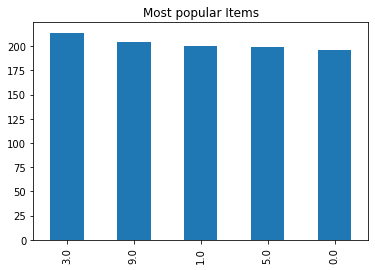

In [12]:
popular_items = df['ProdID'].value_counts().head(5)
popular_items.plot(kind = 'bar')
plt.title("Most popular Items")

#### Most popular Catagories

Text(0.5, 1.0, 'Most popular categories')

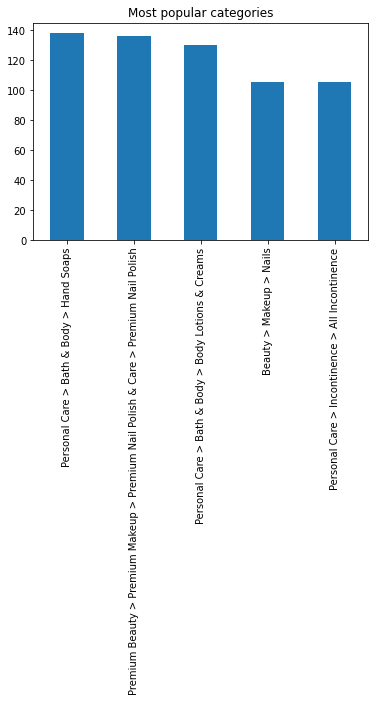

In [13]:
popular_items = df['Category'].value_counts().head(5)
popular_items.plot(kind = 'bar')
plt.title("Most popular categories")

### Most Popular Brands

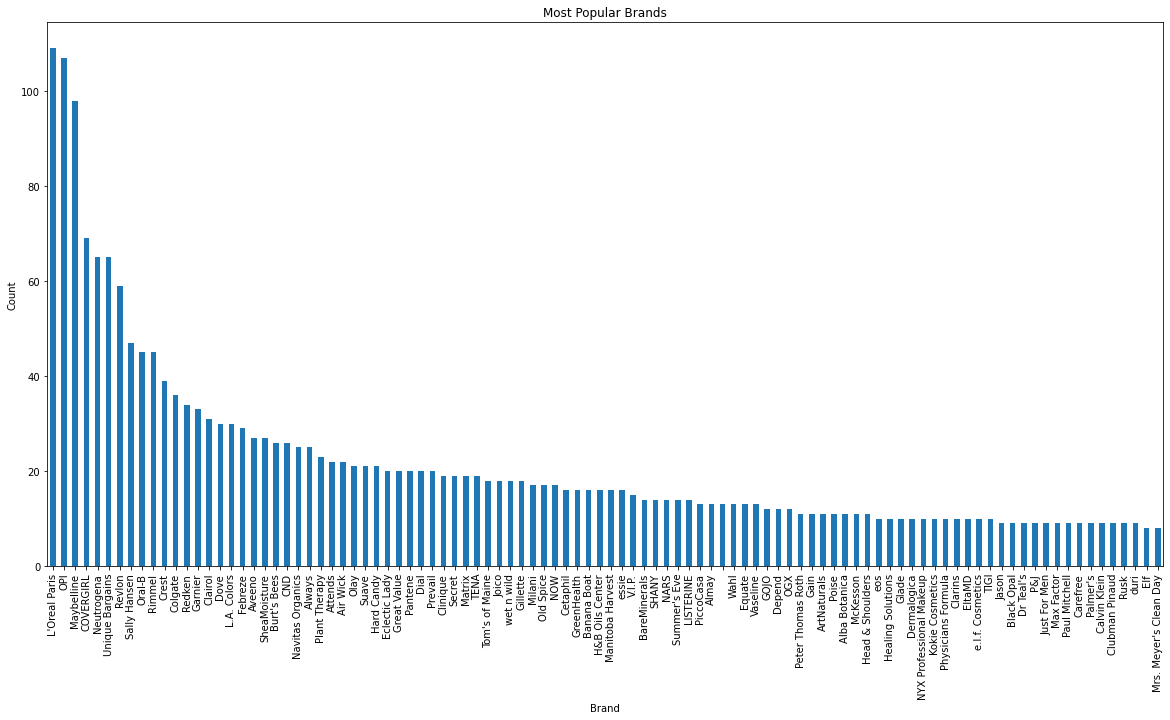

In [14]:
popular_brand = df['Brand'].value_counts().head(100)  # Adjust the number as needed
plt.figure(figsize=(20, 10))  # Adjust the figsize to fit the plot
popular_brand.plot(kind='bar')
plt.title("Most Popular Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels to fit them better
plt.show()

In [15]:
# Count occurrences of each combination of 'Rating' and 'ProdID'
top_rated_products = (
    df.groupby(['Rating', 'ProdID'])
    .size()
    .reset_index(name='Count')  # Convert to DataFrame and name the count column
    .sort_values(by=['Rating', 'Count'], ascending=[False, False])  # Sort by Rating, then Count
    .head(10)  # Get the top 5
)

top_rated_products

,Rating,ProdID,Count
2249,5.0,3.0,25
2246,5.0,0.0,23
2248,5.0,2.0,23
2255,5.0,9.0,22
2253,5.0,7.0,20
2247,5.0,1.0,18
2251,5.0,5.0,15
2254,5.0,8.0,12
2250,5.0,4.0,11
2252,5.0,6.0,11


### Top-rated Products

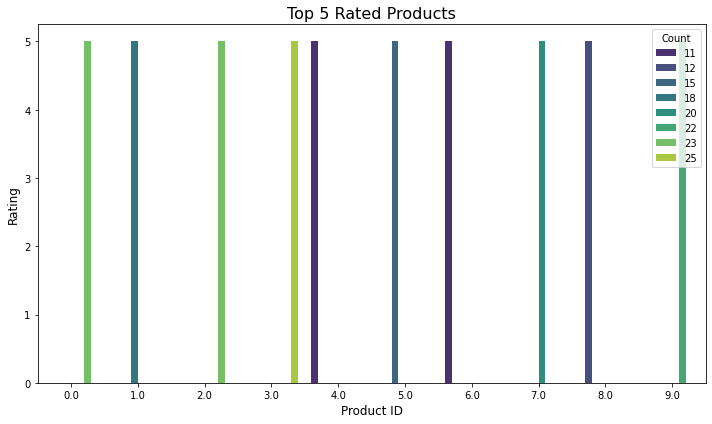

In [16]:
# Bar plot for top-rated products
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ProdID',
    y='Rating',
    data=top_rated_products,
    hue='Count',
    palette='viridis'
)

# Customizing the plot
plt.title('Top 5 Rated Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Count', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [17]:
# Preprocess Tags column
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_tags(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ",".join(words)

df["Tags"] = df["Tags"].apply(clean_tags)

### Feature Correlation Matrix

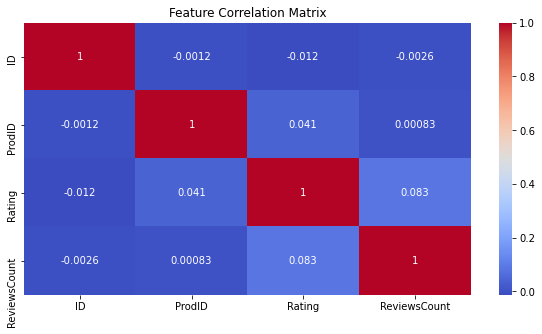

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


### PCA for dimensionality reduction

In [19]:
class PCA:
    def __init__(self, target_explained_variance=None):
        self.target_explained_variance = target_explained_variance
        self.feature_size = -1

    def standardize(self, X):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        return scaler.fit_transform(X)

    def compute_mean_vector(self, X_std):
        return np.mean(X_std, axis=0)

    def compute_cov(self, X_std, mean_vec):
        m = X_std.shape[0]
        X_centered = X_std - mean_vec
        return (X_centered.T @ X_centered) / (m - 1)

    def compute_eigen_vector(self, cov_mat):
        eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
        return eigen_values, eigen_vectors

    def compute_explained_variance(self, eigen_vals):
        total = np.sum(eigen_vals)
        explained_variance = eigen_vals / total
        return explained_variance

    def cumulative_sum(self, var_exp):
        return np.cumsum(var_exp)

    def compute_weight_matrix(self, eig_pairs, cum_var_exp):
        cum_var_exp = np.array(cum_var_exp)
        num_components = np.argmax(cum_var_exp >= self.target_explained_variance)
        matrix_w = np.hstack(
            [eig_pairs[i][1].reshape(-1, 1) for i in range(num_components)]
        )
        return matrix_w

    def transform_data(self, X_std, matrix_w):
        return X_std.dot(matrix_w)

    def fit(self, X):
        self.feature_size = X.shape[1]
        X_std = self.standardize(X)
        mean_vec = self.compute_mean_vector(X_std)
        cov_mat = self.compute_cov(X_std, mean_vec)
        eigen_vals, eigen_vecs = self.compute_eigen_vector(cov_mat)
        explained_variance = self.compute_explained_variance(eigen_vals)
        cum_var_exp = self.cumulative_sum(explained_variance)
        eig_pairs = [(eigen_vals[i], eigen_vecs[:, i]) for i in range(len(eigen_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        matrix_w = self.compute_weight_matrix(eig_pairs, cum_var_exp)
        return self.transform_data(X_std=X_std, matrix_w=matrix_w)

In [20]:
# Select numeric columns for clustering
X = df[["Rating", "ReviewsCount"]]

# PCA for Dimensionality Reduction
pca = PCA(target_explained_variance=0.95)
X_pca = pca.fit(X)
print(f"Reduced dimensions: {X_pca.shape[1]}")

Reduced dimensions: 1


# 3. Unsupervised Model building - Train and Test

In [21]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#### Rating-Based Recommendation using Hierarchical Clustering

In [22]:
# Rating-Based Recommendation using Hierarchical Clustering
# Fit Agglomerative Clustering to train data
features_train = train_df[["Rating", "ReviewsCount"]].values
n_clusters = 10  # Optimal clusters can be tuned
hc = AgglomerativeClustering(n_clusters=n_clusters)
train_df["Cluster"] = hc.fit_predict(features_train)

def recommend_by_rating(product_name, train_df,category_name, top_n):
    category_df = train_df[train_df["Category"] == category_name]
    
    # Check if the product exists in the filtered data
    if product_name not in category_df["Name"].values:
        return pd.DataFrame()  # Return an empty dataframe if the product is not found
    
    # Get the cluster of the product
    product_cluster = category_df[category_df["Name"] == product_name]["Cluster"].values[0]
 
    # Filter the products in the same cluster and the same category
    category_cluster_products = category_df[category_df["Cluster"] == product_cluster]
    
    # Exclude the input product itself (optional)
    category_cluster_products = category_cluster_products[category_cluster_products["Name"] != product_name]
    # Sort by rating in descending order
    similar_products = category_cluster_products.nlargest(top_n, "Rating")
     
    # Return the top N most similar products based on rating
    return similar_products[["Name", "Rating"]]

#### Content-Based Recommendation using TF-IDF and Cosine Similarity

In [23]:
# Content-Based Recommendation using TF-IDF and Cosine Similarity
# Fit TfidfVectorizer to train data
vectorizer = TfidfVectorizer()
tfidf_matrix_train = vectorizer.fit_transform(train_df["Tags"])  # Matrix of TF-IDF values for train data
content_similarity_train = cosine_similarity(tfidf_matrix_train)  # Cosine similarity between product tags


def recommend_by_content(product_name, train_df,category_name, top_n):
    category_df = train_df[train_df["Category"] == category_name]
    # Ensure the product name exists in the train_df
    if product_name not in category_df["Name"].values:
        return pd.DataFrame()  # Return an empty dataframe if the product is not found

    # Find the index of the product in the train_df after resetting the index
    idx = category_df[category_df["Name"] == product_name].index[0]  # Find the index of the product
    if idx >= len(content_similarity_train):  # Check if the index exceeds the size of the matrix
        return pd.DataFrame()  # Return an empty dataframe if index is out of bounds

    # Get similarity scores for the product
    scores = list(enumerate(content_similarity_train[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)  # Sort by similarity score
    top_indices = [i[0] for i in scores[1:top_n+1]]  # Get the top N similar products
    return train_df.iloc[top_indices][["Name", "Tags"]]  # Return the top N similar products



### Evaluate Recommendation Systems (Train-Test split)

In [24]:
# Evaluate Recommendation Systems (Train-Test split)
from IPython.display import display, Markdown


def evaluate_recommendations(test_df, train_df, top_n):
    # Filter test_df to include only products that exist in train_df
    matched_test_df = test_df[test_df["Name"].isin(train_df["Name"])]
    
    recommendations = []
    
    for idx, row in matched_test_df.iterrows():
        
        product_name = row["Name"]
        
        category_name = row["Category"]
    
        # Rating-based Recommendations using train_df
        rating_recommendations = recommend_by_rating(product_name, train_df,category_name, top_n)
        # content-based Recommendations using train_df
        content_recommendations = recommend_by_content(product_name, train_df,category_name, top_n)
        if (not rating_recommendations.empty and "Name" in rating_recommendations.columns) and (not content_recommendations.empty and "Name" in content_recommendations.columns):
            recommendations.append({
                    "Product": product_name,
                    "Rating Recommendations": rating_recommendations[["Name", "Rating"]].values.tolist(),
                    "Content Recommendations": content_recommendations[["Name","Tags"]].values.tolist()
                })
  
    
    return recommendations

# Example evaluation
eval_recommendations = evaluate_recommendations(test_df,train_df, top_n=5)

# Display some example recommendations
for rec in eval_recommendations[:5]:  # Print first 5 examples
        display(Markdown(f"**Product:** {rec['Product']}"))
        display(Markdown(f"**Rating-Based Recommendations:** {rec['Rating Recommendations']}"))
        display(Markdown(f"**Content-Based Recommendations:** {rec['Content Recommendations']}"))
        print("-" * 40)

**Product:** Australian Gold Botanical Natural Sunscreen Continuous Spray

**Rating-Based Recommendations:** [['Australian Gold Sunscreen High Strength SPF 15 Waterproof Sunscreen Moisturizing Lotion', 4.9], ['Hawaiian Tropic Silk Hydration Weightless Sunscreen Lotion', 4.8], ['Sun Bum Sun Bum Sunscreen Face Stick, 0.45 oz', 4.8], ['Hawaiian Tropic Silk Hydration Weightless Sunscreen Lotion', 4.8], ['Banana Boat Ultra Sport Clear Sunscreen Spray SPF 100, 6 oz', 4.6]]

**Content-Based Recommendations:** [['OPI Nail GelColor Gel Polish NEON Color .5oz/15mL - Positive Vibes Only GCN73', 'opi,nail,gelcolor,gel,polish,neon,color,5oz15ml,positive,vibes,gcn73,walmart,walmartcom'], ['OPI Infinite Shine Nail Polish, Mini Scotland Collection, 0.13 Oz (Set of 5)', 'opi,infinite,shine,nail,polish,mini,scotland,collection,013,oz,set,5,walmart,walmartcom'], ['Sally Hansen Miracle Gel, 051 Peach Please (Neon), 0.5 fl oz', 'sally,hansen,miracle,gel,051,peach,neon,05,fl,oz,walmart,walmartcom'], ['Sally Hansen Miracle Gel, 053 Miami Ice (Neon), 0.5 fl oz', 'sally,hansen,miracle,gel,053,miami,ice,neon,05,fl,oz,walmart,walmartcom'], ['CHINA GLAZE Nail Lacquer - Metro Collection - Trendsetter', 'china,glaze,nail,lacquer,metro,collection,trendsetter,walmart,walmartcom']]

----------------------------------------


**Product:** MAYBELLINE

**Rating-Based Recommendations:** [['Maybelline Expert Wear Trios Eyeshadow, 0.13 oz', 4.7], ['Maybelline Expert Wear Duos Eyeshadow, 0.08 oz', 3.5], ['Maybelline EyeStudio Color Plush Silk Eyeshadow', 0.0], ['Maybelline Expertwear Monos Eyeshadow 20S Linen', 0.0], ['Maybelline EyeStudio Color Tattoo 24Hr Eyeshadow, Bad To The Bronze [25], 0.14 oz (Pack of 4)', 0.0]]

**Content-Based Recommendations:** [['Foundation', 'foundation,walmart,walmartcom'], ['PHOERA Liquid Foundation Professional Makeup Full Coverage Fast Base Brighten long-lasting Shade', 'phoera,liquid,foundation,professional,makeup,coverage,fast,base,brighten,longlasting,shade,walmart,walmartcom'], ['PHOERA Liquid Foundation Professional Makeup Full Coverage Fast Base Brighten long-lasting Shade', 'phoera,liquid,foundation,professional,makeup,coverage,fast,base,brighten,longlasting,shade,walmart,walmartcom'], ['Maybelline Pure Makeup', 'maybelline,pure,makeup,walmart,walmartcom'], ['Maybelline: Classic Ivory Pure Makeup Shine-Free Foundation, 1 Fl Oz', 'maybelline,classic,ivory,pure,makeup,shinefree,foundation,1,fl,oz,walmart,walmartcom']]

----------------------------------------


**Product:** Compagnie de Provence Savon de Marseille Extra Pure Liquid Soap Made in France

**Rating-Based Recommendations:** [['Juicy Couture Perfumed Soap 5.25oz/150g New', 5.0], ['Ahava Natural Dead Sea Mud Gift Box, 13.6 Oz', 5.0], ['Dermalogica Conditioning Body Wash Pro 32 oz (FREE SHIPPING)', 5.0], ['Kneipp Mineral Bath Salt, Deep Breathe, Pine and Fir, 2.1 oz.', 5.0], ['Erno Laszlo Sea Mud Deep Cleansing Bar, 3.4 Oz', 4.3]]

**Content-Based Recommendations:** [['Rusk Sensories Pure Mandarin and Jasmine Shampoo - 13.5 oz Shampoo', 'rusk,sensories,pure,mandarin,jasmine,shampoo,135,oz,shampoo,walmart,walmartcom'], ['Rusk Sensories Calm Guarana and Ginger Nourishing Shampoo', 'rusk,sensories,calm,guarana,ginger,nourishing,shampoo,walmart,walmartcom'], ['Volumizing Therapy Shampoo by Biosilk for Unisex - 7 oz Shampoo', 'volumizing,therapy,shampoo,biosilk,unisex,7,oz,shampoo,walmart,walmartcom'], ['Redken Extreme Shampoo, 33.8 oz', 'redken,extreme,shampoo,338,oz,walmart,walmartcom'], ['Paul Mitchell Tea Tree Special Shampoo, 16.9 Oz', 'paul,mitchell,tea,tree,special,shampoo,169,oz,walmart,walmartcom']]

----------------------------------------


**Product:** Dial Antibacterial Liquid Hand Soap, Spring Water, 7.5 Ounce (Pack of 10)

**Rating-Based Recommendations:** [['Antibacterial Hand Soap - 5 gallon pail', 5.0], ['Softsoap Brand Clear Hand Soap Refill (80 oz. bottles, 2 pack)', 5.0], ['Stockhausen SHN-GPF3LNA Solopol Gfx Heavy Duty Foam Hand Cleaner, 3.25l Cartridge', 5.0], ['Deep Steep Foaming Hand Wash Grapefruit-Bergamot 8 fl oz 237ml', 5.0], ['Dl Permatex Blue Label 01406 Cream Hand Cleaner 4.5 Lb Plastic Tub', 5.0]]

**Content-Based Recommendations:** [['Honeybee Garden Pressed Mineral Powder Foundation Sundance', 'honeybee,garden,pressed,mineral,powder,foundation,sundance,walmart,walmartcom'], ['Maybelline Mineral Powder Natural Perfecting Foundation, 1 fl oz', 'maybelline,mineral,powder,natural,perfecting,foundation,1,fl,oz,walmart,walmartcom'], ['Liquid Mineral Foundation - Pebble by Youngblood for Women - 1 oz Foundation', 'liquid,mineral,foundation,pebble,youngblood,women,1,oz,foundation,walmart,walmartcom'], ['Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural', 'physicians,formula,mineral,wear®,talcfree,mineral,correcting,powder,creamy,natural,walmart,walmartcom'], ['Clarins Ever Matte Shine Control Mineral Powder Compact, Transparent Medium 0.3 oz', 'clarins,matte,shine,control,mineral,powder,compact,transparent,medium,03,oz,walmart,walmartcom']]

----------------------------------------


**Product:** Mgaxyff Reusable Sanitary Pad,Sanitary Pad,10 Types Women Washable Reusable Bamboo Charcoal Cloth Menstrual Mama Sanitary Maternity Pad

**Rating-Based Recommendations:** [['3 Pack - Taro Clotrimazole 7 Vaginal Cream 45 g', 5.0], ['5 pcs/set Bamboo Charcoal Heavy Flow Menstrual Sanitary Pads Set Reusable Cloth Feminine Menstrual Pads + 1 pc Washable Wet Bag', 5.0], ['NutraBlast Boric Acid Suppositories 600mg (30 Count) w/Tea Tree Oil Suppositories (12 Count) | All Natural Intimate Deodorant for Women | Restore Feminine pH Balance', 5.0], ['Vagisil Anti-Itch Medicated Wipes 20 Each (Pack of 2)', 5.0], ['FemiClear Vaginal Itch Relief, 0.5 oz | All- Natural & Organic', 5.0]]

**Content-Based Recommendations:** [['Snooki Ultra Dark 70X Black Bronzer Skin Firming Tanning Bed Lotion by Supre', 'snooki,ultra,dark,70x,black,bronzer,skin,firming,tanning,bed,lotion,supre,walmart,walmartcom'], ['Eminence Organic Skin Care Firm Skin Acai Moisturizer, 2 Oz', 'eminence,organic,skin,care,firm,skin,acai,moisturizer,2,oz,walmart,walmartcom'], ['2 Pack - Australian Gold Dark Tanning Accelerator Spray Gel With Bronzer 8 oz', '2,pack,australian,gold,dark,tanning,accelerator,spray,gel,bronzer,8,oz,walmart,walmartcom'], ['Hot Escapes Bronzer - Tahiti by Buxom for Women - 0.3 oz Bronzer', 'hot,escapes,bronzer,tahiti,buxom,women,03,oz,bronzer,walmart,walmartcom'], ['Physicians Formula Bronze Booster Glow-Boosting Baked Bronzer, Medium to Dark', 'physicians,formula,bronze,booster,glowboosting,baked,bronzer,medium,dark,walmart,walmartcom']]

----------------------------------------


## Conclusion 

This demonstrates "Rating-Based Recommendation" using Hierarchical Clustering and "Content-Based Recommendation" using TF-IDF and Cosine Similarity to suggest products to customers. The two methods complement each other by offering recommendations based on different criteria:

Rating-Based Recommendations: This method groups products with similar rating patterns and review counts, providing highly rated products from the same cluster. It ensures customers receive top-rated products in the same category.

Content-Based Recommendations: By leveraging product tags and TF-IDF with cosine similarity, this method suggests products with similar descriptions or attributes, regardless of their ratings.

The combination of both methods increases the diversity of recommendations, making the system more effective at addressing different customer preferences. This hybrid approach improves user satisfaction by suggesting both high-quality products and those with similar features. Further improvements can be made by tuning hyperparameters or integrating collaborative filtering for personalized recommendations.

## Supervised Learning Model

In [25]:
df1.head()

,ID,ProdID,Category,Brand,Name,Description,ImageUrl,Tags,Rating,ReviewsCount
0,1.705737e+09,2.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"opi,infinite,shine,nail,lacquer,nail,polish,bu...",0.0,0.0
1,9.500000e+01,76.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"nice,n,easy,permanent,color,111,natural,medium...",0.0,0.0
2,8.000000e+00,8.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol,nice,n,easy,permanent,color,7106a,natu...",4.5,29221.0
3,4.000000e+00,3.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"kokie,professional,matte,lipstick,hot,berry,01...",0.0,0.0
4,9.900000e+02,3.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"gillette,trac,ii,plus,razor,blade,refills,fit,...",0.0,131.0


Below is the Supervised learning model with accuracy for the same data.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
df1 = df1.drop(columns=['ID', 'ProdID', 'Name', 'Description', 'ImageUrl', 'Tags'])

# Handle missing values with median imputation (more robust than mean)
imputer = SimpleImputer(strategy='median')
df1[['Rating', 'ReviewsCount']] = imputer.fit_transform(df1[['Rating', 'ReviewsCount']])

# Convert categorical columns to numeric using one-hot encoding
df1 = pd.get_dummies(df1, columns=['Brand'], drop_first=True)  # Drop first to avoid multicollinearity

# Define features (X) and target (y)
X = df1.drop(columns=['Category']).values  # Convert to NumPy array for efficiency
y = df1['Category'].values

# Standardize numerical features for better convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train logistic regression model with optimized solver
model = LogisticRegression(max_iter=2000, solver='saga', n_jobs=-1)  # 'saga' handles large datasets better

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9509126236828654
